In [114]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [115]:
#hide
from fastbook import *

# Collaborative Filtering Deep Dive

## Data from kaggle

[Anime Recommendations Database](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database?select=rating.csv)

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

Content
Anime.csv

anime_id - myanimelist.net's unique id identifying an anime.
name - full name of anime.
genre - comma separated list of genres for this anime.
type - movie, TV, OVA, etc.
episodes - how many episodes in this show. (1 if movie).
rating - average rating out of 10 for this anime.
members - number of community members that are in this anime's
"group".
Rating.csv

user_id - non identifiable randomly generated user id.
anime_id - the anime that this user has rated.
rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

Content
Anime.csv

anime_id - myanimelist.net's unique id identifying an anime.
name - full name of anime.
genre - comma separated list of genres for this anime.
type - movie, TV, OVA, etc.
episodes - how many episodes in this show. (1 if movie).
rating - average rating out of 10 for this anime.
members - number of community members that are in this anime's
"group".
Rating.csv

user_id - non identifiable randomly generated user id.
anime_id - the anime that this user has rated.
rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

For this chapter we are going to work on this movie recommendation problem. We'll start by getting some data suitable for a collaborative filtering model.

## A First Look at the Data

In [116]:
from fastai.collab import *
from fastai.tabular.all import *

In [117]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")

In [118]:
anime.rename(columns={'rating': 'anime_rating'}, inplace=True)
anime

,anime_id,name,genre,type,episodes,anime_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Hentai,OVA,1,4.98,175


In [119]:
rating["rating"].unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

fazendo o merge entre as 2 tabelas

In [120]:
df = pd.merge(rating, anime, on='anime_id')

In [121]:
df[df.isna().any(axis=1)]

,user_id,anime_id,rating,name,genre,type,episodes,anime_rating,members
7651992,1145,28647,-1,Kappo,NaN,Movie,1,4.71,335
7651993,13052,28647,4,Kappo,NaN,Movie,1,4.71,335
7651994,13954,28647,1,Kappo,NaN,Movie,1,4.71,335
7651995,41244,28647,-1,Kappo,NaN,Movie,1,4.71,335
7651996,56343,28647,-1,Kappo,NaN,Movie,1,4.71,335
...,...,...,...,...,...,...,...,...,...
7811624,64178,30862,7,Yubi wo Nusunda Onna,NaN,Movie,1,5.65,223
7812060,43480,33674,-1,No Game No Life Movie,"Adventure, Comedy, Ecchi, Fantasy, Game, Supernatural",Movie,1,NaN,32041
7812068,43873,9488,7,Cencoroll 2,"Action, Sci-Fi",Movie,1,NaN,15181
7813666,53492,31510,4,Guitar,NaN,Movie,1,4.11,47


In [122]:
df.dropna(inplace=True)
df.drop(df.loc[df['rating'] < 0].index,inplace=True)

In [123]:
df

,user_id,anime_id,rating,name,genre,type,episodes,anime_rating,members
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super Power",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super Power",TV,220,7.81,683297
5,21,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super Power",TV,220,7.81,683297
6,28,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super Power",TV,220,7.81,683297
7,34,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super Power",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813720,65175,30095,7,Qi Cai Lao Fu Zi,"Action, Comedy, Seinen",Movie,1,6.78,82
7813721,65175,30096,7,Lao Fu Zi Shui Hu Chuan,"Comedy, Historical, Seinen",Movie,1,6.71,65
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai dayo!!,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45


In [124]:
df = df[:100000]

We can then build a `DataLoaders` object from this table. By default, it takes the first column for the user, the second column for the item (here our movies), and the third column for the ratings. We need to change the value of `item_name` in our case to use the titles instead of the IDs:

In [125]:
dls = CollabDataLoaders.from_df(df, item_name='name', bs=64)
dls.show_batch()

,user_id,name,rating
0,3103,Naruto,9
1,59268,Shuffle!,8
2,35591,Fate/stay night,10
3,2102,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,3
4,46270,Girls Bravo: First Season,10
5,59682,Shuffle!,5
6,4475,Elfen Lied,7
7,51006,Shuffle!,4
8,56428,Elfen Lied,7
9,556,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,5


To represent collaborative filtering in PyTorch we <u>can't</u> just use the crosstab representation directly, especially if we want it to fit into our deep learning framework. We can represent our movie and user latent factor tables as simple matrices:

In [126]:
#dls.classes

In [127]:
n_users  = len(dls.classes['user_id'])
n_movies = len(dls.classes['name'])
n_factors = 5

print(f'Number of users: {n_users}')
print(f'Number of movies: {n_movies}')
print(f'Number of factors: {n_factors}')

user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

print(f'User factors shape: {user_factors.shape}')
print(f'Movie factors shape: {movie_factors.shape}')

Number of users: 37247
Number of movies: 12
Number of factors: 5
User factors shape: torch.Size([37247, 5])
Movie factors shape: torch.Size([12, 5])


In [128]:
one_hot_3 = one_hot(3, n_users).float()

In [129]:
one_hot_3[0:5]

tensor([0., 0., 0., 1., 0.])

In [130]:
user_factors.shape

torch.Size([37247, 5])

In [131]:
user_factors.t() @ one_hot_3

tensor([-0.9467, -0.9816, -1.3437,  0.1983,  0.3297])


It gives us the same vector as the one at index 3 in the matrix:

In [132]:
user_factors[3]

tensor([-0.9467, -0.9816, -1.3437,  0.1983,  0.3297])

## Collaborative Filtering from Scratch

In [133]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)

If you haven't seen object-oriented programming before, then don't worry, you won't need to use it much in this book. We are just mentioning this approach here, because most online tutorials and documentation will use the object-oriented syntax.

Note that the input of the model is a tensor of shape `batch_size x 2`, where the first column (`x[:, 0]`) contains the user IDs and the second column (`x[:, 1]`) contains the movie IDs. As explained before, we use the *embedding* layers to represent our matrices of user and movie latent factors:

In [134]:
#dls.one_batch()

In [135]:
x,y = dls.one_batch()
x.shape

torch.Size([64, 2])

Now that we have defined our architecture, and created our parameter matrices, we need to create a `Learner` to optimize our model. In the past we have used special functions, such as `cnn_learner`, which set up everything for us for a particular application. Since we are doing things from scratch here, we will use the plain `Learner` class:

In [136]:
emb_sz_rule(n_users)

581

In [137]:
emb_sz_rule(n_movies)

6

In [138]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

We are now ready to fit our model:

In [139]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,32.741436,30.880447,00:10
1,14.461152,20.226046,00:08
2,4.880461,18.656233,00:09
3,2.565312,16.910509,00:09
4,1.399434,16.687693,00:09


The first thing we can do to make this model a little bit better is to force those predictions to be between 0 and 5. For this, we just need to use `sigmoid_range`, like in `<<chapter_multicat>>`. One thing we discovered empirically is that it's better to have the range go a little bit over 5, so we use `(0, 5.5)`:

In [140]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [141]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,16.003931,15.494324,00:10
1,9.292103,13.119364,00:08
2,7.952738,12.883899,00:09
3,7.678333,12.814278,00:10
4,7.841909,12.794051,00:09


In [142]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

Let's try training this and see how it goes:

In [143]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,9.849319,9.398762,00:10
1,7.717768,7.967118,00:08
2,7.954343,7.985005,00:10
3,7.753742,7.940380,00:10
4,7.798185,7.947933,00:12


### Weight Decay

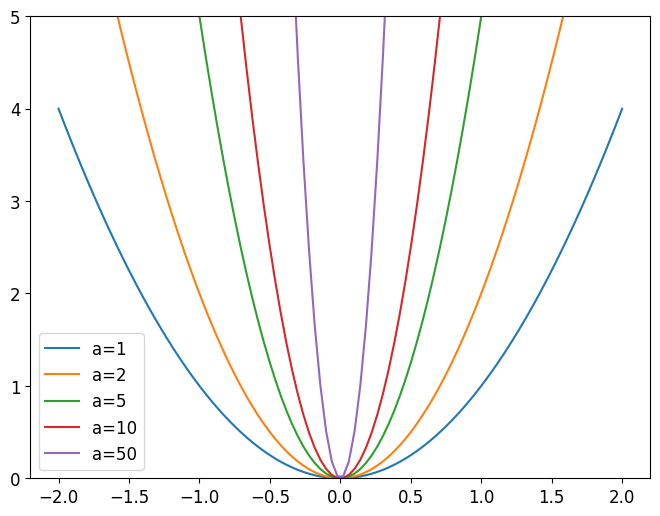

In [144]:
#hide_input
#id parabolas
x = np.linspace(-2,2,100)
a_s = [1,2,5,10,50]
ys = [a * x**2 for a in a_s]
_,ax = plt.subplots(figsize=(8,6))
for a,y in zip(a_s,ys): ax.plot(x,y, label=f'a={a}')
ax.set_ylim([0,5])
ax.legend();

Much better!

### Creating Our Own Embedding Module

In [145]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,10.191158,9.813913,00:20
1,7.984528,8.090153,00:15
2,7.797036,8.097918,00:10
3,7.743424,8.107379,00:10
4,7.709432,8.128533,00:10


In [146]:
class T(Module):
    def __init__(self): self.a = torch.ones(3)

L(T().parameters())

(#0) []

In [147]:
class T(Module):
    def __init__(self): self.a = nn.Parameter(torch.ones(3))

L(T().parameters())

(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

In [148]:
class T(Module):
    def __init__(self): self.a = nn.Linear(1, 3, bias=False)

t = T()
L(t.parameters())

(#1) [Parameter containing:
tensor([[-0.6520],
        [-0.0533],
        [-0.1928]], requires_grad=True)]

In [149]:
type(t.a.weight)

torch.nn.parameter.Parameter

We can create a tensor as a parameter, with random initialization, like so:

In [150]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

Let's use this to create `DotProductBias` again, but without `Embedding`:

In [151]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users*movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)

Then let's train it again to check we get around the same results we saw in the previous section:

Now, let's take a look at what our model has learned.

In [152]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,10.438401,9.877268,00:12
1,8.229010,8.084142,00:10
2,7.784991,8.079904,00:09
3,7.719107,8.121877,00:12
4,7.802353,8.139556,00:10


## Interpreting Embeddings and Biases

Our model is already useful, in that it can provide us with movie recommendations for our users—but it is also interesting to see what parameters it has discovered. The easiest to interpret are the biases. Here are the movies with the lowest values in the bias vector:

In [153]:
movie_bias = learn.model.movie_bias.squeeze()
idxs = movie_bias.argsort()[:5]
[dls.classes['name'][i] for i in idxs]

['#na#',
 'Girls Bravo: Second Season',
 'Girls Bravo: First Season',
 'Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!',
 'Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!']

In [154]:
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['name'][i] for i in idxs]

['Naruto',
 'Elfen Lied',
 'Fate/stay night',
 'Shakugan no Shana',
 'School Rumble']

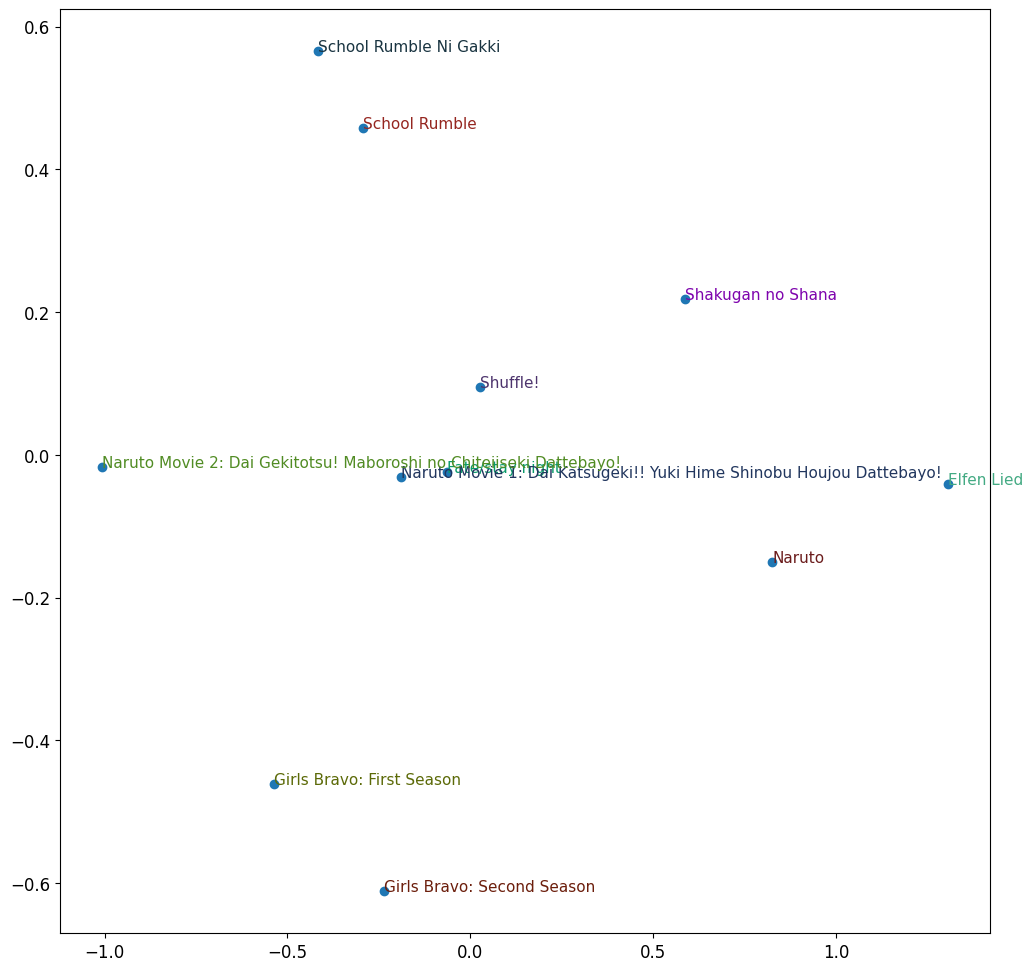

In [156]:
#hide_input
#id img_pca_movie
#caption Representation of movies based on two strongest PCA components
#alt Representation of movies based on two strongest PCA components
g = df.groupby('name')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['name'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = list(range(11))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

### Using fastai.collab

In [157]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [158]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,10.339557,9.900859,00:14
1,7.906632,8.082121,00:10
2,7.887567,8.094350,00:09
3,7.612942,8.126069,00:10
4,7.755201,8.144695,00:09


In [159]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(37247, 50)
  (i_weight): Embedding(12, 50)
  (u_bias): Embedding(37247, 1)
  (i_bias): Embedding(12, 1)
)

In [160]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['name'][i] for i in idxs]

['Naruto',
 'Elfen Lied',
 'Fate/stay night',
 'Shakugan no Shana',
 'School Rumble']

Another interesting thing we can do with these learned embeddings is to look at _distance_.

### Embedding Distance

In [161]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['name'].o2i['Naruto']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['name'][idx]

'Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!'

## Bootstrapping a Collaborative Filtering Model

The biggest challenge with using collaborative filtering models in practice is the *bootstrapping problem*. The most extreme version of this problem is when you have no users, and therefore no history to learn from. What products do you recommend to your very first user?

But even if you are a well-established company with a long history of user transactions, you still have the question: what do you do when a new user signs up? And indeed, what do you do when you add a new product to your portfolio? There is no magic solution to this problem, and really the solutions that we suggest are just variations of *use your common sense*. You could assign new users the mean of all of the embedding vectors of your other users, but this has the problem that that particular combination of latent factors may be not at all common (for instance, the average for the science-fiction factor may be high, and the average for the action factor may be low, but it is not that common to find people who like science-fiction without action). Better would probably be to pick some particular user to represent *average taste*.

Better still is to use a tabular model based on user meta data to construct your initial embedding vector. When a user signs up, think about what questions you could ask them that could help you to understand their tastes. Then you can create a model where the dependent variable is a user's embedding vector, and the independent variables are the results of the questions that you ask them, along with their signup metadata. We will see in the next section how to create these kinds of tabular models. (You may have noticed that when you sign up for services such as Pandora and Netflix, they tend to ask you a few questions about what genres of movie or music you like; this is how they come up with your initial collaborative filtering recommendations.)

One thing to be careful of is that a small number of extremely enthusiastic users may end up effectively setting the recommendations for your whole user base. This is a very common problem, for instance, in movie recommendation systems. People that watch anime tend to watch a whole lot of it, and don't watch very much else, and spend a lot of time putting their ratings on websites. As a result, anime tends to be heavily overrepresented in a lot of *best ever movies* lists. In this particular case, it can be fairly obvious that you have a problem of representation bias, but if the bias is occurring in the latent factors then it may not be obvious at all.

Such a problem can change the entire makeup of your user base, and the behavior of your system. This is particularly true because of positive feedback loops. If a small number of your users tend to set the direction of your recommendation system, then they are naturally going to end up attracting more people like them to your system. And that will, of course, amplify the original representation bias. This type of bias has a natural tendency to be amplified exponentially. You may have seen examples of company executives expressing surprise at how their online platforms rapidly deteriorated in such a way that they expressed values at odds with the values of the founders. In the presence of these kinds of feedback loops, it is easy to see how such a divergence can happen both quickly and in a way that is hidden until it is too late.

In a self-reinforcing system like this, we should probably expect these kinds of feedback loops to be the norm, not the exception. Therefore, you should assume that you will see them, plan for that, and identify up front how you will deal with these issues. Try to think about all of the ways in which feedback loops may be represented in your system, and how you might be able to identify them in your data. In the end, this is coming back to our original advice about how to avoid disaster when rolling out any kind of machine learning system. It's all about ensuring that there are humans in the loop; that there is careful monitoring, and a gradual and thoughtful rollout.

Our dot product model works quite well, and it is the basis of many successful real-world recommendation systems. This approach to collaborative filtering is known as *probabilistic matrix factorization* (PMF). Another approach, which generally works similarly well given the same data, is deep learning.

## Deep Learning for Collaborative Filtering

To turn our architecture into a deep learning model, the first step is to take the results of the embedding lookup and concatenate those activations together. This gives us a matrix which we can then pass through linear layers and nonlinearities in the usual way.

Since we'll be concatenating the embeddings, rather than taking their dot product, the two embedding matrices can have different sizes (i.e., different numbers of latent factors). fastai has a function `get_emb_sz` that returns recommended sizes for embedding matrices for your data, based on a heuristic that fast.ai has found tends to work well in practice:

In [162]:
embs = get_emb_sz(dls)
embs

[(37247, 581), (12, 6)]

Let's implement this class:

In [163]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range

    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

And use it to create a model:

In [164]:
model = CollabNN(*embs)

`CollabNN` creates our `Embedding` layers in the same way as previous classes in this chapter, except that we now use the `embs` sizes. `self.layers` is identical to the mini-neural net we created in <<chapter_mnist_basics>> for MNIST. Then, in `forward`, we apply the embeddings, concatenate the results, and pass this through the mini-neural net. Finally, we apply `sigmoid_range` as we have in previous models.

Let's see if it trains:

In [165]:
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,7.748896,7.814616,00:24
1,7.761322,7.859970,00:22
2,7.825565,7.933967,00:21
3,7.869188,7.912960,00:20
4,7.763592,7.919214,00:24


In [166]:
learn.export("deep_model.pkl")
user_id = pd.DataFrame({'user_id': df['user_id'].copy()})
user_id = user_id.drop_duplicates()
user_id.to_csv('users.csv', index=False)

`learn.model` is an object of type `EmbeddingNN`. Let's take a look at fastai's code for this class:

Wow, that's not a lot of code! This class *inherits* from `TabularModel`, which is where it gets all its functionality from. In `__init__` it calls the same method in `TabularModel`, passing `n_cont=0` and `out_sz=1`; other than that, it only passes along whatever arguments it received.

### End sidebar

In [168]:
animes_name = pd.DataFrame({'animes_name': df['name'].copy()})
animes_name = animes_name.drop_duplicates()
animes_name.to_csv('animes_name.csv', index=False)